# Footprints of other Galactic Plane Surveys

A range of other surveys have or will observe some or all of the Galactic Plane, and it is valuable to take these regions into account when designing the Roman Plane survey.  This maximizes the science return from all of the dataset by providing complementary wavelength coverage as well as higher spatial resolution imaging for deblending. 

The goal of this notebook is to explore the footprints of these surveys.  

In [15]:
from os import path
import survey_footprints
from astropy import units as u 
from mw_plot import MWSkyMap
import matplotlib.pyplot as plt
import numpy as np
from astropy_healpix import HEALPix
from astropy.coordinates import SkyCoord 
%matplotlib inline
import healpy as hp

# Configure path to local repository
root_dir = '/Users/rstreet/software/rgps'

The footprints of other surveys are defined in JSON format as HEALpixel maps in the config directory.  They can be loaded using the convenience functions provided:

In [8]:
survey_regions = survey_footprints.load_survey_footprints(root_dir)
survey_regions

{'rubin_galactic_plane': array([0., 0., 0., ..., 0., 0., 0.])}

### Rubin Galactic Plane Survey

Rubin Observatory's Legacy Survey of Space and Time (LSST) includes a survey of sections of the Galactic Plane.  We can visualize the survey footprint for reference.

/var/folders/1d/5hlyfsgd0kl_nd815xmp9cv00000gn/T/ipykernel_50454/472222161.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x1000 with 0 Axes>

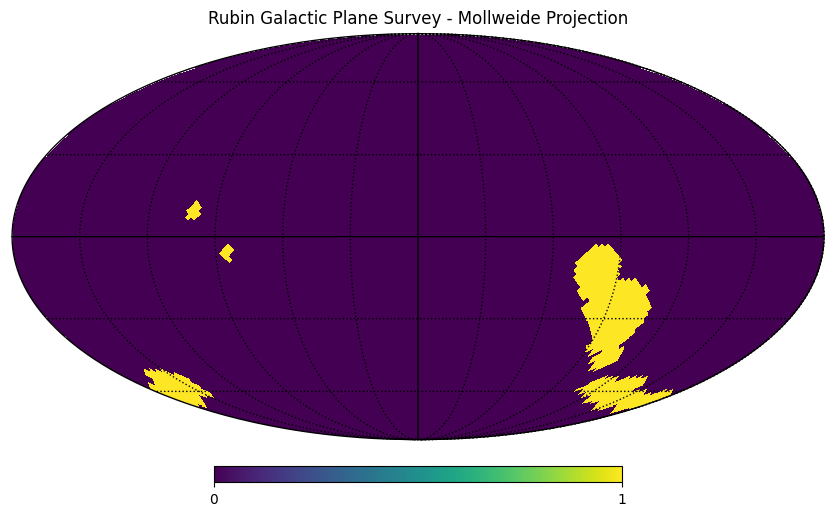

In [12]:
fig = plt.figure(1,(10,10))
hp.mollview(survey_regions['rubin_galactic_plane'], title='Rubin Galactic Plane Survey - Mollweide Projection')
hp.graticule()
plt.tight_layout()

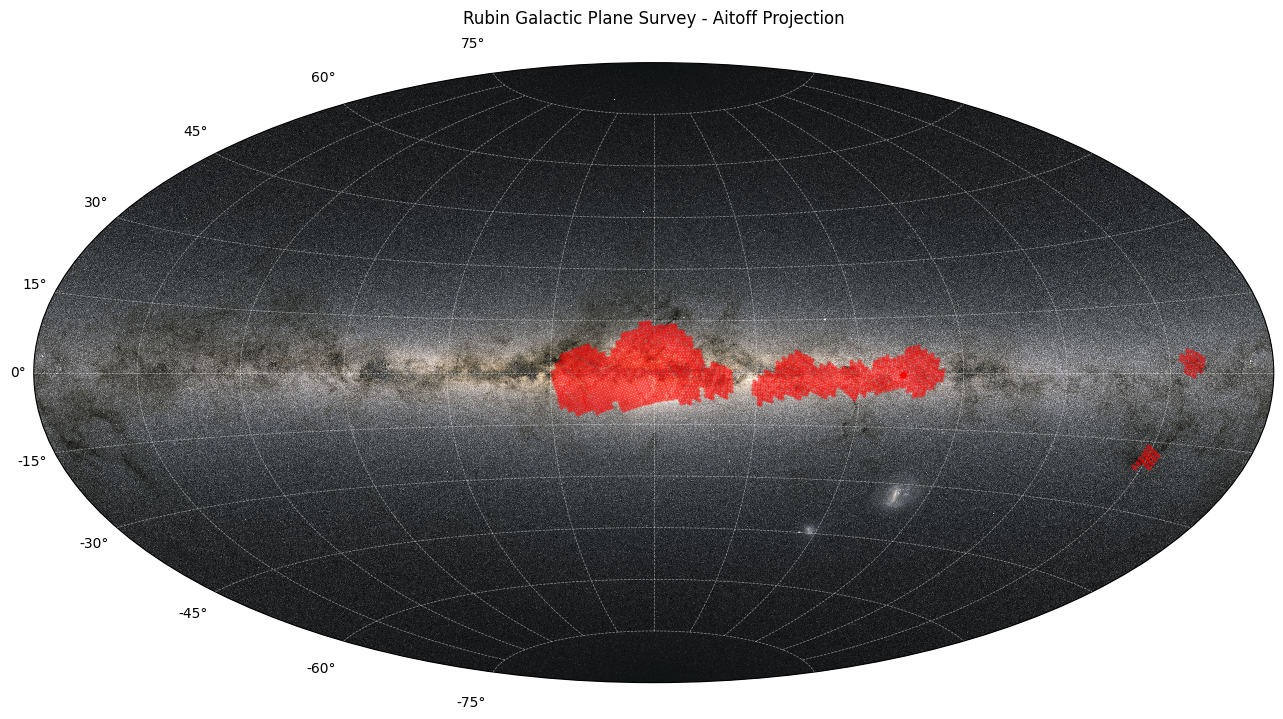

In [27]:
mw1 = MWSkyMap(projection='aitoff', grayscale=False, grid='galactic', background='optical', figsize=(16,10))
mw1.title = 'Rubin Galactic Plane Survey - Aitoff Projection'
proj = HEALPix(nside=64, order='ring', frame='icrs')
pixels = np.where(survey_regions['rubin_galactic_plane'] > 0)[0]
s = proj.healpix_to_skycoord(pixels)
mw1.scatter(s.ra.deg*u.deg, s.dec.deg*u.deg, c="r", s=5, alpha=0.4)